<center>
<img src="./pict/pandas_logo.jpg">
<br />
<br />

__Pandas__ - библиотека для работы с панельными данными и временными рядами

Документация: https://pandas.pydata.org

In [1]:
import pandas as pd # импортируем Pandas
%matplotlib inline

In [2]:
# считываем данные
# https://www.kaggle.com/c/titanic/data

data = pd.read_csv('./data/titanic/train.csv') 

In [ ]:
pd.read_excel # из excel

In [ ]:
pd.read_hdf # из hdf

In [ ]:
pd.read_json # из json

Основные объекты - __DataFrame__ и __Series__

In [3]:
data.head(5) # "голова" таблицы

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5) # ее хвост

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
type(data), type(data['Pclass'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [6]:
data['Survived'].head() # к Series применимы аналогичные методы 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
data.Survived.head() # обращаться можно как через [Series_name]
                     # так и через .Series_name

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
data['Survived'].keys()[:5] # Series можно рассматривать 
                            # как словарь с ключами и значениями

RangeIndex(start=0, stop=5, step=1)

In [9]:
data['Survived'].values[:5] # значения

array([0, 1, 1, 1, 0])

In [10]:
data.columns # DataFrame так же можно рассматривать как словарь, 
             # столцы - ключи, Series - значения

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.values[:5] # значения

array([[1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0,
        'A/5 21171', 7.25, nan, 'S'],
       [2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C'],
       [3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0,
        'STON/O2. 3101282', 7.925, nan, 'S'],
       [4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
        'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S'],
       [5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0,
        '373450', 8.05, nan, 'S']], dtype=object)

In [12]:
data.index[:5] # каждая строка проиндексирована, 
               # к индексу можно обратиться через атрибут

RangeIndex(start=0, stop=5, step=1)

In [13]:
data.loc[10, 'Cabin'] # обращение по индексу, столбцу

'G6'

In [14]:
data.iloc[10]['Cabin'] # через целочисленный порядок

'G6'

In [15]:
data.dtypes # data.Survived.astype(type) - изменение типа Survived

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
data.shape # форма таблицы, по аналогии с numpy

(891, 12)

Несколько полезных методов:

In [17]:
data.drop_duplicates().shape # убираем полные дубли, можно конкретизировать по определенным столбцам

(891, 12)

In [18]:
data.describe() # различные статистики

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data.describe(include=['object']).T # только категориальные признаки

,count,unique,top,freq
Name,891,891,"Torber, Mr. Ernst William",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


In [20]:
data.describe(include=['int64']).T # только вещественные

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0


In [21]:
data.sort_values(['Age', 'Fare'], ascending=[False, True]).head() # сортируем по столбцам, .sort_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [22]:
data.Age.nsmallest(4) # 5 наименьших, .nlargest

803    0.42
755    0.67
469    0.75
644    0.75
Name: Age, dtype: float64

In [23]:
data.Age.idxmax() # индекс максимального .idxmin

630

In [24]:
data.Age.rank(method='first').head() # ранг, номера возрастов по возрастанию

0    205.0
1    527.0
2    302.0
3    480.0
4    481.0
Name: Age, dtype: float64

In [ ]:
# массовое изменение данных
data.Sex.replace({'male':'M', 'female':'F'}, inplace=False).head() # можно и через .map

Маски в Pandas

In [25]:
data[(data['Pclass'] == 3) & (data['Sex'] == 'male')].head() # маска: пассажирыв 3 классе, мужчины 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [27]:
data.Cabin.isnull()[:5] # маска для nan

0     True
1    False
2     True
3    False
4     True
Name: Cabin, dtype: bool

In [28]:
data[data.Cabin.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [29]:
data.Cabin.fillna('Не было заполнено')[:5] # заполнение Nan

0    Не было заполнено
1                  C85
2    Не было заполнено
3                 C123
4    Не было заполнено
Name: Cabin, dtype: object

Создание __DataFrame__, удаление элементов

In [30]:
new_data = pd.DataFrame({'new data': [5, 3, -2, 3, 20], 'Passenger': [1, 5, 3, 8, 6]})
new_data

,new data,Passenger
0,5,1
1,3,5
2,-2,3
3,3,8
4,20,6


In [31]:
data.drop([0, 1], axis=0, inplace=False).head() # удаление строки/столбца

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


Слияние __DataFrame__

In [32]:
right = new_data.copy()
left = data[data.Cabin.isnull()].head()
pd.merge(left, right, left_on='PassengerId', right_on='Passenger')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new data,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,5,1
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-2,3
2,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,5
3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,20,6
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3,8


Группировка даннных

In [33]:
data.groupby(['Age'], as_index=False)['Fare'].median().tail() # для каждого уникального возраста 
                                                              # находим медианную цену билета

,Age,Fare
83,70.0,40.7500
84,70.5,7.7500
85,71.0,42.0792
86,74.0,7.7750
87,80.0,30.0000


Агрегирование

In [34]:
import numpy as np

data.groupby(['Age'])['Fare'].aggregate([min, np.mean, max]).tail() # агрегация по одному столбцу

,min,mean,max
Age,,,
70.0,10.5000,40.7500,71.0000
70.5,7.7500,7.7500,7.7500
71.0,34.6542,42.0792,49.5042
74.0,7.7750,7.7750,7.7750
80.0,30.0000,30.0000,30.0000


In [35]:
# агрегация по нескольким столбцам
data.groupby(['Pclass', 'Age'])['Fare'].aggregate([min, np.median, max]).reset_index().tail() 

,Pclass,Age,min,median,max
177,3,61.0,6.2375,6.2375,6.2375
178,3,63.0,9.5875,9.5875,9.5875
179,3,65.0,7.7500,7.7500,7.7500
180,3,70.5,7.7500,7.7500,7.7500
181,3,74.0,7.7750,7.7750,7.7750


In [36]:
data.groupby(['Pclass'])['Fare'].apply(lambda x: x / sum(x)).head() # нормировка по столбцу с помощью apply

0    0.001080
1    0.003922
2    0.001180
3    0.002921
4    0.001199
Name: Fare, dtype: float64

Фильтрация

In [37]:
data.groupby(['Name']).filter(lambda x: x['Fare'] > 100).head() # пассажиры с ценой билета выше 100$

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


In [38]:
data[data['Name'].map(lambda x: x.startswith('B'))].head() # еще пример фильтрации

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S


Созданиие переменных

In [39]:
pd.DataFrame(pd.value_counts(pd.cut(data.Fare, 10))) # создание категориального признака из непрерывного

,Fare
"(-0.512, 51.233]",732
"(51.233, 102.466]",106
"(102.466, 153.699]",31
"(204.932, 256.165]",11
"(256.165, 307.398]",6
"(461.096, 512.329]",3
"(153.699, 204.932]",2
"(409.863, 461.096]",0
"(358.63, 409.863]",0
"(307.398, 358.63]",0


In [40]:
pd.get_dummies(data['Sex']).head() # создание dumpy переменных

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [41]:
print('Количество пассажиров: ', data.PassengerId.nunique())
print('Процент выживших: {} %'.format(int(100 * data['Survived'].sum() / data.PassengerId.nunique())))

Количество пассажиров:  891
Процент выживших: 38 %


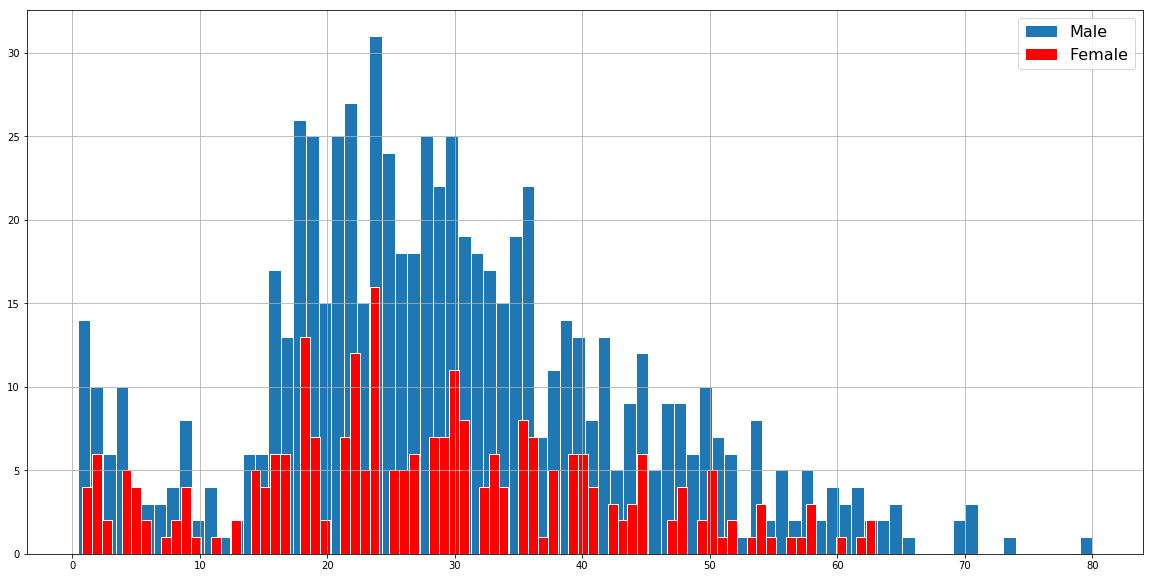

In [43]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

data[data['Sex'] == 'female']['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='red')
ax.legend(['Male', 'Female'], prop={'size':16})

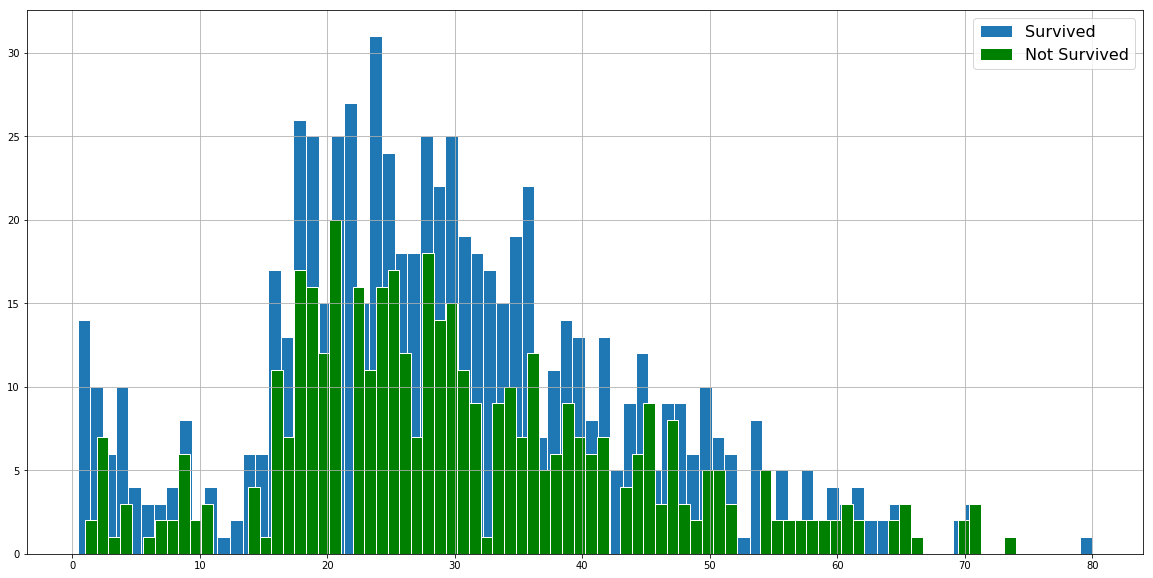

In [45]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

data[data['Survived'] == 0]['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

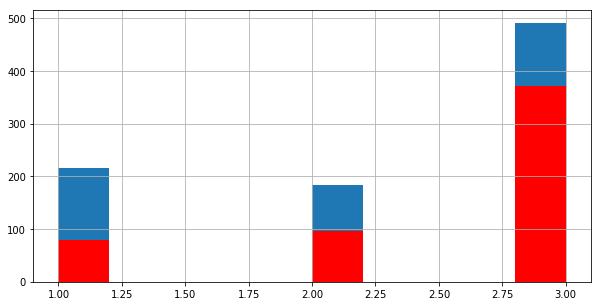

In [46]:
data.Pclass.hist(figsize=(10, 5))
data[data['Survived'] == 0].Pclass.hist(color='red', grid=True)

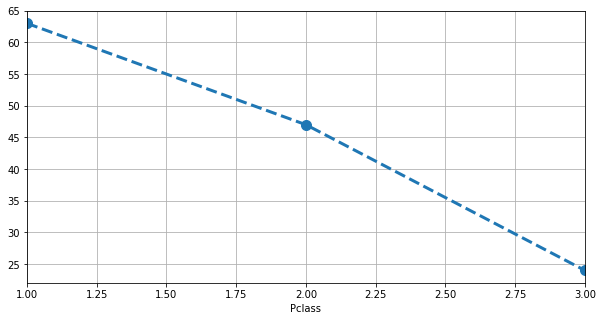

In [47]:
series = round(100 * data.groupby(['Pclass'])['Survived'].sum() / data.groupby(['Pclass'])['PassengerId'].nunique())
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

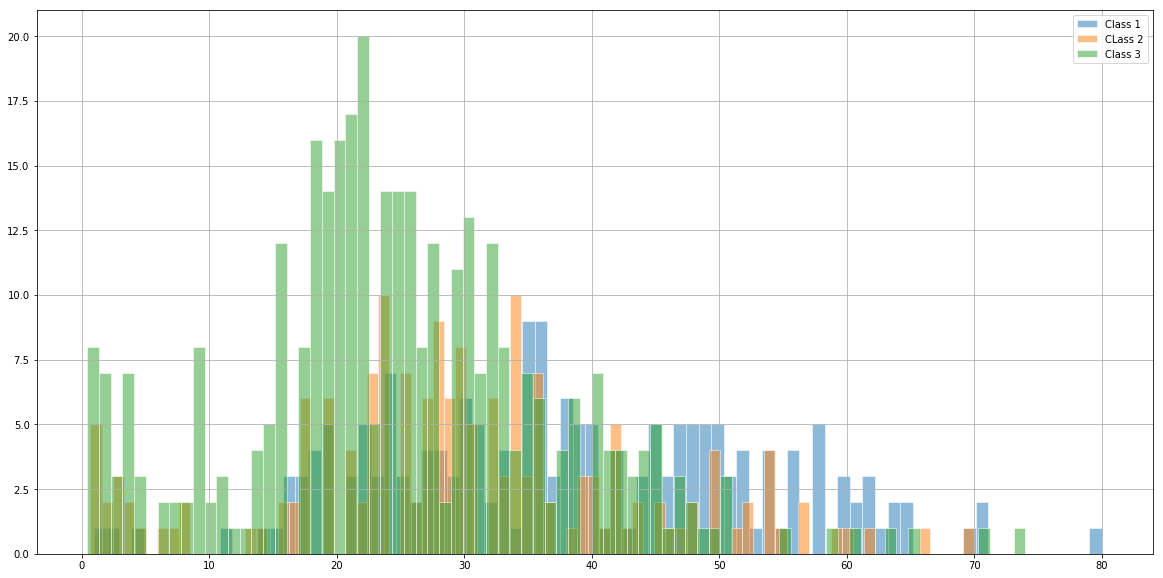

In [48]:
ax =data[data.Pclass == 1]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
data[data.Pclass == 2]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class 1', 'CLass 2', 'Class 3'])

In [50]:
data.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [51]:
data['Family'] = data['SibSp'] + data['Parch']

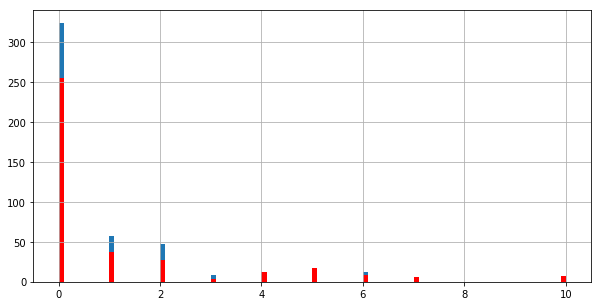

In [52]:
data[data.Pclass == 3]['Family'].hist(figsize=(10, 5), bins=100)
data[(data.Pclass == 3) & (data.Survived == 0)]['Family'].hist(figsize=(10, 5), color='red', bins=100)

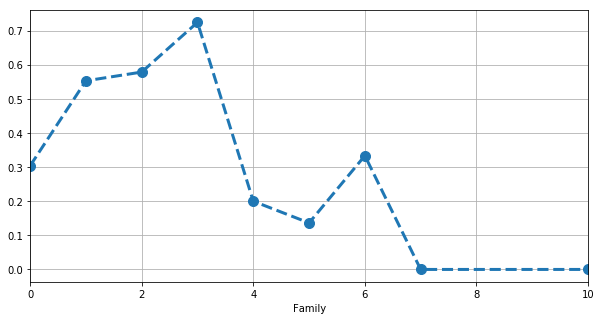

In [53]:
series = data.groupby(['Family'])['Survived'].sum() / data.groupby(['Family'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)